<a href="https://colab.research.google.com/github/HosseinEyvazi/Vision-AI-Booklet/blob/main/Vision3_Obj_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### **A Quick Overview of Object Detection**

#### **1. Real-World Applications**

Object detection enables machines to "see" and interpret their surroundings, which has led to breakthroughs in many fields:

* **Healthcare:** It assists medical professionals by automatically detecting anomalies in scans, such as identifying tumors in X-rays or highlighting irregularities in microscope slides.
* **Manufacturing:** In factories, it automates quality control by spotting defects on assembly lines, counting items accurately, and ensuring products are assembled correctly.
* **Autonomous Driving:** It is the core technology that allows self-driving cars to perceive the world, identifying pedestrians, other vehicles, traffic lights, and road signs to navigate safely.

#### **2. What are YOLO Models?**

YOLO stands for "You Only Look Once." It is a famous family of object detection models celebrated for its incredible speed and efficiency.

Unlike older methods that would scan an image multiple times, YOLO processes the entire image in a single pass. It predicts all bounding boxes and class probabilities simultaneously, making it ideal for real-time applications like analyzing live video.

#### **3. Ultralytics: The Low-Code Framework**

Ultralytics is a company that has made using state-of-the-art YOLO models remarkably simple. Their open-source framework acts as a "low-code" platform, allowing developers to train and deploy powerful object detection models with just a few lines of Python. It is an excellent starting point for anyone new to the field.

#### **4. Key Performance Metrics For Object Detection**

To evaluate how well a model performs, we use specific metrics.

**Intersection over Union (IoU)**

IoU measures the accuracy of a single predicted bounding box. It is the ratio of the overlapping area to the total combined area of the predicted box and the actual (ground truth) box. A score of 1 means a perfect match, while 0 means no overlap.



**mean Average Precision (mAP)**

mAP is the primary metric for measuring the overall accuracy of an object detection model. It provides a single score that summarizes the model's performance across **all object classes**.

**Numerical mAP Example:**

Let's calculate the **Average Precision (AP)** for a single class, "Cat".

* **Ground Truth:** There are **4 cats** in our test images.
important note : The example has a set of test images (**the exact number of images isn't important**). Across all of those images combined, there are a total of 4 actual cats. This is the ground truth.


* **Model Predictions:** Our model makes 8 predictions, which we rank by confidence score. We'll say a prediction is correct if its **IoU > 0.5**.

| Rank | Confidence | Correct? (TP/FP) |
| :--- | :--- | :--- |
| 1 | 0.98 | **TP** |
| 2 | 0.95 | **TP** |
| 3 | 0.91 | **FP** |
| 4 | 0.88 | **TP** |
| 5 | 0.82 | **FP** |
| 6 | 0.75 | **FP** |
| 7 | 0.63 | **TP** |
| 8 | 0.55 | **FP** |

Now, we go down the list and calculate the **Precision** (`TP / (TP + FP)`) and **Recall** (`TP / Total Actual Cats`) at each step.

| Rank | Correct? | Cumulative TPs | Precision | Recall |
| :--- | :--- | :--- | :--- | :--- |
| 1 | **TP** | 1 | 1/1 = **1.00** | 1/4 = 0.25 |
| 2 | **TP** | 2 | 2/2 = **1.00** | 2/4 = 0.50 |
| 3 | FP | 2 | 2/3 = 0.67 | 2/4 = 0.50 |
| 4 | **TP** | 3 | 3/4 = **0.75** | 3/4 = 0.75 |
| 5 | FP | 3 | 3/5 = 0.60 | 3/4 = 0.75 |
| 6 | FP | 3 | 3/6 = 0.50 | 3/4 = 0.75 |
| 7 | **TP** | 4 | 4/7 = **0.57** | 4/4 = 1.00 |
| 8 | FP | 4 | 4/8 = 0.50 | 4/4 = 1.00 |

To get the **Average Precision (AP)**, we average the precision values at each point where we found a new correct object (each **TP**):

* **AP for Cat** = (1.00 + 1.00 + 0.75 + 0.57) / 4 = **0.83**

The **mAP** (mean Average Precision) is the average of the AP scores across all classes. If we also had a class "Dog" with an AP of 0.75, the mAP would be:

* **mAP** = (AP Cat + AP Dog) / 2 = (0.83 + 0.75) / 2 = **0.79**


\


## Two Important Questions :

### How We Know a Prediction is a TP

A prediction is marked as a **True Positive (TP)** if its predicted bounding box sufficiently overlaps with the ground-truth (actual) bounding box for an object.

This "overlap quality" is measured by a metric called **Intersection over Union (IoU)**.

1.  **Calculate IoU:** We compare the predicted box and the ground-truth box.
2.  **Check Threshold:** We check if the IoU score is above a certain threshold. In your example, the threshold is **0.5**.

If `IoU > 0.5`, the prediction is a **TP**. If not, it's a **False Positive (FP)**.



### Why We Need Cumulative TPs

The **"Cumulative TPs"** column is a running total of the correct predictions found so far. We need this running total to calculate **Precision** and **Recall** at each step down the list.

* **Precision:** What fraction of our predictions *so far* are correct?
    * $Precision = \frac{Cumulative TPs}{Current Rank (Total Predictions so far)}$
    * Example at Rank 4: Precision is `3 / 4 = 0.75`.

* **Recall:** What fraction of all *actual cats* have we found *so far*?
    * $Recall = \frac{Cumulative TPs}{Total Actual Cats}$
    * Example at Rank 4: Recall is `3 / 4 = 0.75`.

Without this running total, we couldn't know how the model's performance changes as we consider more of its lower-confidence predictions.



Iou

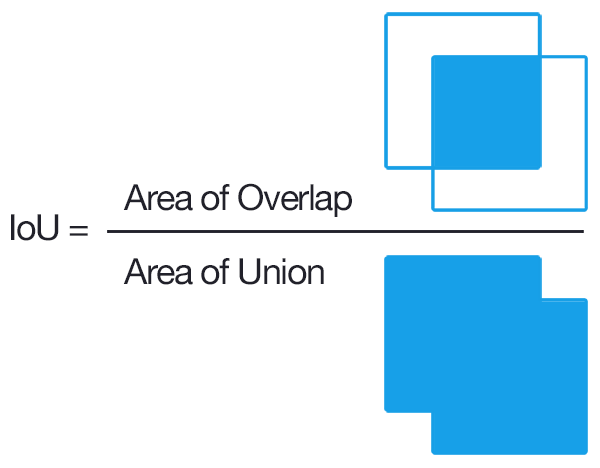

Ultralytics library installed and modules imported.
Pre-trained model 'yolov8n.pt' loaded successfully.
Image prepared for inference.
Running model inference...

0: 640x480 4 persons, 1 bus, 1 stop sign, 200.7ms
Speed: 5.7ms preprocess, 200.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)
Inference complete.
Annotated image saved to 'detection_results.jpg'

Displaying input and output images...


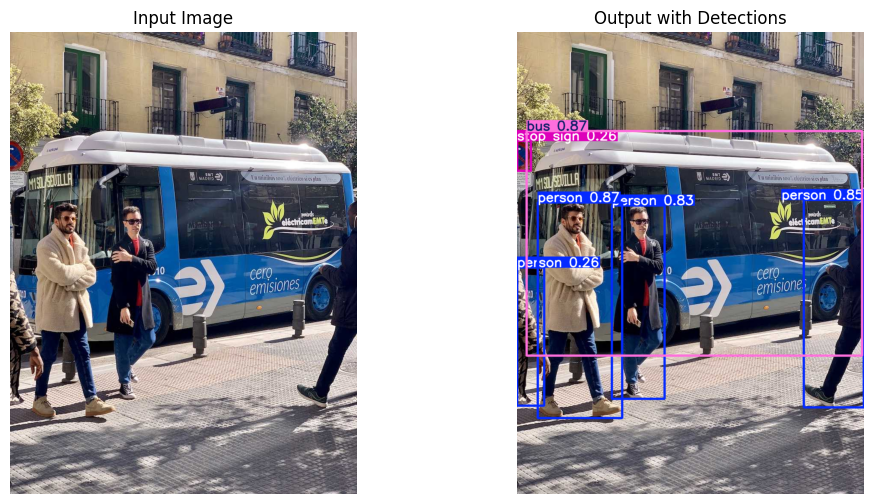


Detected objects:
- Class: bus, Confidence: 0.87, BBox: [22, 231, 805, 756]
- Class: person, Confidence: 0.87, BBox: [48, 398, 245, 902]
- Class: person, Confidence: 0.85, BBox: [669, 392, 809, 877]
- Class: person, Confidence: 0.83, BBox: [221, 405, 344, 857]
- Class: person, Confidence: 0.26, BBox: [0, 550, 63, 873]
- Class: stop sign, Confidence: 0.26, BBox: [0, 254, 32, 324]


In [ ]:
# Step 1: Install the Ultralytics library
# This command installs the necessary package to run YOLOv8.
# It also installs matplotlib for displaying images.
!pip install ultralytics matplotlib

# Step 2: Import necessary libraries
from ultralytics import YOLO
from PIL import Image
import requests
import io
import matplotlib.pyplot as plt

print("Ultralytics library installed and modules imported.")

# Step 3: Load a pre-trained model
# We are using 'yolov8n.pt', where 'n' stands for "nano".
# It's the smallest and fastest YOLOv8 model, perfect for quick examples.
try:
    model = YOLO('yolov8n.pt')
    print("Pre-trained model 'yolov8n.pt' loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")
    # Exit if model fails to load
    exit()

# Step 4: Prepare the image for prediction
# We'll use a standard example image from the Ultralytics documentation.
image_url = 'https://ultralytics.com/images/bus.jpg'
print(f"Downloading image from: {image_url}")

try:
    # Download the image content
    response = requests.get(image_url)
    response.raise_for_status() # Raise an exception for bad status codes
    # Open the image from the downloaded bytes
    input_image = Image.open(io.BytesIO(response.content))
    print("Image prepared for inference.")
except Exception as e:
    print(f"Error downloading or opening image: {e}")
    exit()

# Step 5: Run inference on the image
# The model is called like a function on the image.
print("Running model inference...")
results = model(input_image)
print("Inference complete.")

# Step 6: Process and display the results
if results:
    # .plot() returns a NumPy array in BGR format (standard for OpenCV)
    annotated_image_bgr = results[0].plot()

    # Convert BGR to RGB for correct color display with PIL/matplotlib
    annotated_image_rgb = annotated_image_bgr[..., ::-1]
    output_image = Image.fromarray(annotated_image_rgb)

    # Save the output image to a file
    save_path = 'detection_results.jpg'
    output_image.save(save_path)
    print(f"Annotated image saved to '{save_path}'")

    # Display the input and output images side-by-side
    print("\nDisplaying input and output images...")
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(input_image)
    ax[0].set_title("Input Image")
    ax[0].axis('off') # Hide axes

    ax[1].imshow(output_image)
    ax[1].set_title("Output with Detections")
    ax[1].axis('off') # Hide axes

    plt.show()


# Step 7: Accessing the results programmatically
# You can loop through the results to get detailed information on each detection.
print("\nDetected objects:")
for result in results:
    # The Boxes object contains bounding box information
    boxes = result.boxes
    for box in boxes:
        # Get bounding box coordinates in (left, top, right, bottom) format
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # Get the confidence score of the prediction
        confidence = box.conf[0]

        # Get the detected class ID and name
        class_id = int(box.cls[0])
        class_name = model.names[class_id]

        # Print the details for each detected object
        print(f"- Class: {class_name}, Confidence: {confidence:.2f}, BBox: [{x1}, {y1}, {x2}, {y2}]")



### Main Idea

The confidence score is a percentage that shows **how sure the model is** about its prediction. It answers the question: "How confident am I that this specific object is inside this box?"

A label like "person 0.95" means the model is 95% confident that it has correctly identified a person.



---

### How It's Calculated

This score is actually a combination of two separate probabilities multiplied together:

1.  **Objectness Score:** How sure the model is that the box contains *any* object at all (not just background).
2.  **Class Probability:** *If* there is an object, how sure the model is that it belongs to a specific class (e.g., "person"). This is the result from the `softmax` function.

**Final Score = (Objectness Score) × (Class Probability)**

So, a high confidence score means the model is sure there is an object in the box *and* it is sure about what that object is.


In [ ]:
# Step 1: Install System-Level Dependencies for Video Processing
# This is the key fix: installs ffmpeg, which provides the necessary video codecs for OpenCV.
!apt-get update && apt-get install -y ffmpeg libsm6 libxext6

# Step 2: Install Ultralytics
# Make sure you have the latest version.
!pip install -U ultralytics

# Step 3: Import necessary libraries
import requests
import os
from ultralytics import YOLO

print("Ultralytics library imported.")

# Step 4: Define video path and download if necessary
# Simplified path handling: use one variable for the absolute path.
video_path = "/content/car_detection.mp4"
video_url = "https://github.com/intel-iot-devkit/sample-videos/raw/master/car-detection.mp4"

if not os.path.exists(video_path):
    print(f"Downloading sample video to '{video_path}'...")
    try:
        response = requests.get(video_url, stream=True)
        response.raise_for_status()
        with open(video_path, "wb") as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print("Download complete.")
    except Exception as e:
        print(f"Error downloading video: {e}")
        exit()
else:
    print(f"Sample video already exists at '{video_path}'.")

# Step 5: Load a pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')
print("YOLOv8 model loaded.")

# Step 6: Run inference on the video
print("\nRunning inference on the video... This may take a moment.")
# Pass the simplified path string directly to the model
results = model(video_path, save=True)

# The output path will be printed to the console automatically by Ultralytics.
print("\nProcessing complete.")
print("The output video has been saved in the 'runs/detect/predict' directory.")
print("You can find the file there and play it to see the detections.")



Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:5 https://cli.github.com/packages stable InRelease [3,917 B]
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:11 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Fetched 3,917 B in 1s (2,834 B/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (

### Yolo = you only look once :

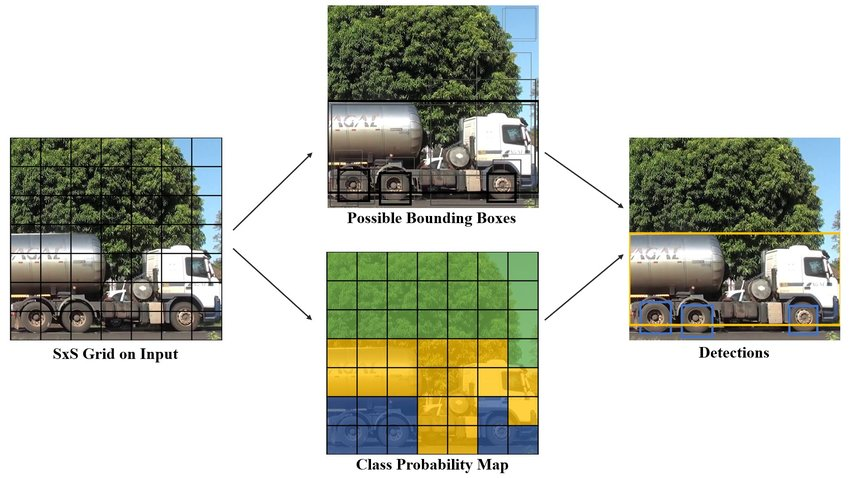

Of course. Here is a rewritten version of the selected text, aiming for a slightly more concise and direct tone.

### **A Quick Guide to Media Encoding**

#### **1. Introduction to Video Processing**

Video processing is the technology used to enhance, analyze, or transform digital video. From object detection in a security feed to streaming a movie on your phone, it's a fundamental part of how we interact with modern media.

#### **2. Core Video Concepts**

  * **Resolution:** This is the **size** of a video frame in pixels (e.g., 1920 width × 1080 height). It defines the video's dimensions, not its quality, although higher resolutions allow for more visible detail.
  * **Frame Rate (FPS):** The number of individual images (frames) shown per second. A higher FPS creates smoother, more fluid motion. Common rates include 24 FPS for movies, 30 FPS for TV, and 60+ FPS for gaming.
  * **Codec (Coder-Decoder):** A codec is an algorithm that **compresses** (encodes) video to shrink its file size and **decompresses** (decodes) it for playback. Without codecs, video files would be too large to stream or store. (Examples: H.264, H.265/HEVC).
  * **Bitrate:** The amount of data used for each second of video, measured in megabits per second (Mbps). It's a direct trade-off: a higher bitrate results in better quality but a larger file size. It has got a proportioin with framerate and resolution.

#### **3. Understanding FourCC**

  * **What is FourCC?** It stands for **Four-Character Code**, a unique 4-byte ID used to identify a specific video codec. Think of it as a "license plate" that tells your video player which decoder it needs to use.
  * **FourCC vs. Codec:** The distinction is simple: The **Codec** is the actual algorithm that does the compression (e.g., Xvid). The **FourCC** is just its 4-byte name (e.g., `'XVID'`).
  * **Using FourCC in OpenCV:** When saving a video with a library like OpenCV, you provide the FourCC to specify which codec to use for encoding.
    ```python
    # This tells OpenCV to use the Xvid codec to write the video file.
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640, 480))
    ```
    The `*` before `'XVID'` simply unpacks the string into the four characters the function requires.


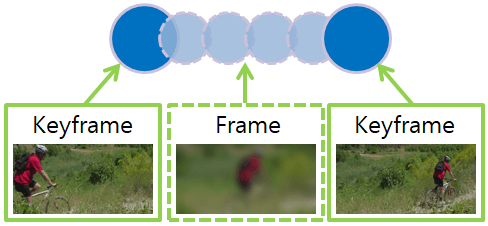



## A Simple Guide to Vector Databases 🚀

### Chapter 1: The Core Idea

#### What is a Vector Database?
A **vector database** is a special type of database built to handle **vector embeddings**—long lists of numbers that represent complex data like text, images, or audio. Its main job isn't to find exact matches but to perform incredibly fast **similarity searches** to find items that are "closest" or most related to a query.



#### What are Vector Embeddings?
Think of an embedding as a coordinate on a giant "meaning map." An AI model called an **embedding model** takes something complex, like the word "cat," and turns it into a vector (e.g., `[0.12, -0.45, 0.89, ...]`). On this map, the vector for "cat" would be very close to the vector for "kitten" but far away from the vector for "car." This is how AI understands context and meaning.

#### Why Can't We Use a Normal Database?
A traditional database, like one using SQL, is great for exact matches (e.g., `WHERE user_id = 123`). If you asked it to find vectors "similar" to another, it would have to manually compare your query vector to **every single vector** in its storage. This is extremely slow and doesn't scale. Vector databases use special algorithms to avoid this brute-force check.

---

### Chapter 2: Measuring "Similarity"

Similarity search is all about finding the "nearest neighbors" in a high-dimensional space. To do that, we need to define what "near" means using mathematical distance metrics.

#### Key Metrics
1.  **Euclidean Distance (L2)**: This is the straight-line distance between two vector points. It's useful when both the magnitude and direction of the vector matter, common in image similarity tasks.
    * $d(A, B) = \sqrt{\sum_{i=1}^{n} (A_i - B_i)^2}$

2.  **Cosine Similarity**: This measures the angle between two vectors, ignoring their magnitude. It's perfect for text, where the direction of the vector captures its semantic meaning. The result ranges from -1 (opposite) to 1 (identical).
    * $Similarity(A, B) = \frac{A \cdot B}{\|A\| \|B\|}$

    

3.  **Dot Product**: A simpler metric that considers both angle and magnitude. It's very fast to calculate and works well in recommendation systems.
    * $A \cdot B = \sum_{i=1}^{n} A_i B_i$

---

### Chapter 3: How It Works Under the Hood

To make searching fast, vector databases can't check every vector. They use **Approximate Nearest Neighbor (ANN)** algorithms to find "close enough" results almost instantly.

#### HNSW: The Highway System for Data
The most popular ANN algorithm is **HNSW (Hierarchical Navigable Small World)**. Imagine it as a multi-layered map for your vectors.

* **Top Layers (Sparse)**: This is the "highway system." It has very few points and long connections, allowing a search to quickly jump to the right general area.
* **Bottom Layer (Dense)**: This is the "local street map." It contains every single vector and is used to find the precise nearest neighbors once the search has arrived in the right neighborhood.



When a new vector is added, it's inserted from the top down, creating connections at each layer to build this efficient, navigable structure.

---

### Chapter 4: Putting It All to Work

#### Top 3 Use Cases
1.  **Semantic Search**: Searching by meaning, not just keywords. (e.g., searching for "summer vacation clothes" and getting results for "shorts" and "sandals").
2.  **Recommendation Engines**: Finding items similar to what a user has liked or viewed.
3.  **Retrieval-Augmented Generation (RAG)**: Giving Large Language Models (LLMs) external knowledge to answer questions, reducing hallucinations and providing up-to-date information.

#### Popular Vector Databases
* **Pinecone**: A fully managed, easy-to-use cloud service. Great for getting into production quickly.
* **Milvus**: An open-source, highly scalable database for large, custom deployments.
* **ChromaDB**: An open-source, simple database that's easy to integrate directly into Python applications for development and smaller projects.
